In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Loading flower dataset and precomputed graph edges / sentiment score

In [3]:
flower_data = pd.read_csv("../Data/General/flower_cleaned.csv", error_bad_lines=False, delimiter=";")

In [4]:
flower_data.head(100)

Flower                             Meaning  AfinnScore  \
0                    Acacia                         secret love           3   
1                  Acanthus                                 art           0   
2                   Aconite                         misanthropy           0   
3                  Agrimony                        thankfulness           0   
4                      Aloe                               grief          -2   
5                    Almond                             promise           1   
6          Amaranth (Globe)                       immortal love           5   
7                  Amaranth                         immortality           0   
8                 Amaryllis                               pride           0   
9                  Ambrosia                love is reciprocated           3   
10                  Anemone                            forsaken           0   
11                  Anemone                 sickness (negative)           0   
12                  Anemone                        anticipation           1   
13                  Anemone                        undying love           3   
14                   Angrec                             royalty           0   
15                Anthurium                         hospitality           0   
16                Anthurium                           happiness           3   
17                Anthurium                           abundance           0   
18            Apple blossom                          preference           0   
19               Arborvitae              everlasting friendship           0   
20                  Arbutus         you are the only one i love           3   
21                     Arum                               faith           1   
22                     Arum                              purity           0   
23                 Asphodel  my regrets follow you to the grave          -4   
24                    Aster                      symbol of love           3   
25                    Aster                          daintiness           0   
26                    Aster                    talisman of love           3   
27                    Aster                            trusting           0   
28                   Azalea                           take care           2   
29                   Azalea                          temperance           0   
..                      ...                                 ...         ...   
70         Carnation [pink]                     a mother's love           3   
71       Carnation [yellow]                           rejection           0   
72       Carnation [yellow]                             disdain          -2   
73       Carnation [yellow]                      disappointment          -2   
74       Carnation [purple]                      capriciousness           0   
75       Carnation [purple]                           whimsical           1   
76       Carnation [purple]                          changeable           0   
77       Carnation [purple]                       unreliability           0   
78        Carnation [mauve]                   dreams of fantasy           1   
79      Carnation [striped]                             refusal           0   
80  Carnation [solid color]                                 yes           1   
81  Carnation [solid color]                         affirmative           0   
82                Celandine                        joys to come           0   
83           Cherry blossom                    a good education           3   
84           Cherry blossom                  transience of life           0   
85           Cherry blossom                       mono no aware          -1   
86           Cherry blossom                           wabi-sabi           0   
87           Cherry blossom                          gentleness           0   
88           Cherry blossom                 kindness (in japan)        

---
# Testing out NetworkX

In [5]:
import networkx as nx
G = nx.Graph()

In [6]:
G.add_nodes_from(range(0, 10))

In [7]:
G.add_edges_from([(1, 2), (4, 5), (1, 6), (6, 8)])

In [8]:
G.nodes[1]['name'] = "hello"

In [9]:
G.nodes.data()

NodeDataView({0: {}, 1: {'name': 'hello'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [10]:
G.edges.data()

EdgeDataView([(1, 2, {}), (1, 6, {}), (4, 5, {}), (6, 8, {})])

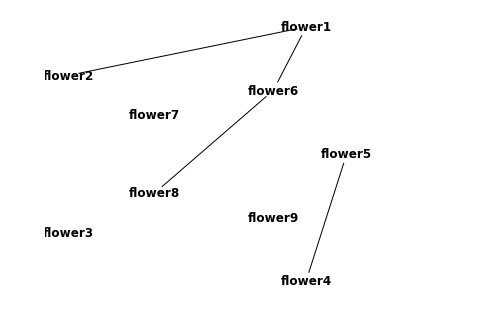

In [11]:
#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color="w", cmap=plt.get_cmap('jet'), labels={1: 'flower1', 2: 'flower2',3: 'flower3',4: 'flower4',5: 'flower5', 6: 'flower6', 7: 'flower7',8: 'flower8',9: 'flower9'})

---
# Building flower meaning graph

In [12]:
flower_graph = nx.Graph()

In [13]:
def add_nodes_from_df(graph, df):
    for index in range(len(df)):
        graph.add_node(index, flower=df.iloc[index].Flower, meaning=df.iloc[index].Meaning, sentiment=df.iloc[index].AfinnScore)

def add_edges_from_df(graph, df, similar_index):
    for index in range(len(df)):
        edges = flower_data.iloc[index][similar_index].lstrip("[").rstrip("]").split(",")
        if edges != [""]:
            for node in edges:
                graph.add_edge(index, int(node))

In [14]:
add_nodes_from_df(flower_graph, flower_data)
#flower_graph.nodes.data()

In [15]:
add_edges_from_df(flower_graph, flower_data, "SimilarIndex40")
#flower_graph.edges.data()

In [16]:
node_flower_name = nx.get_node_attributes(flower_graph, 'flower')

<Figure size 2160x1080 with 0 Axes>

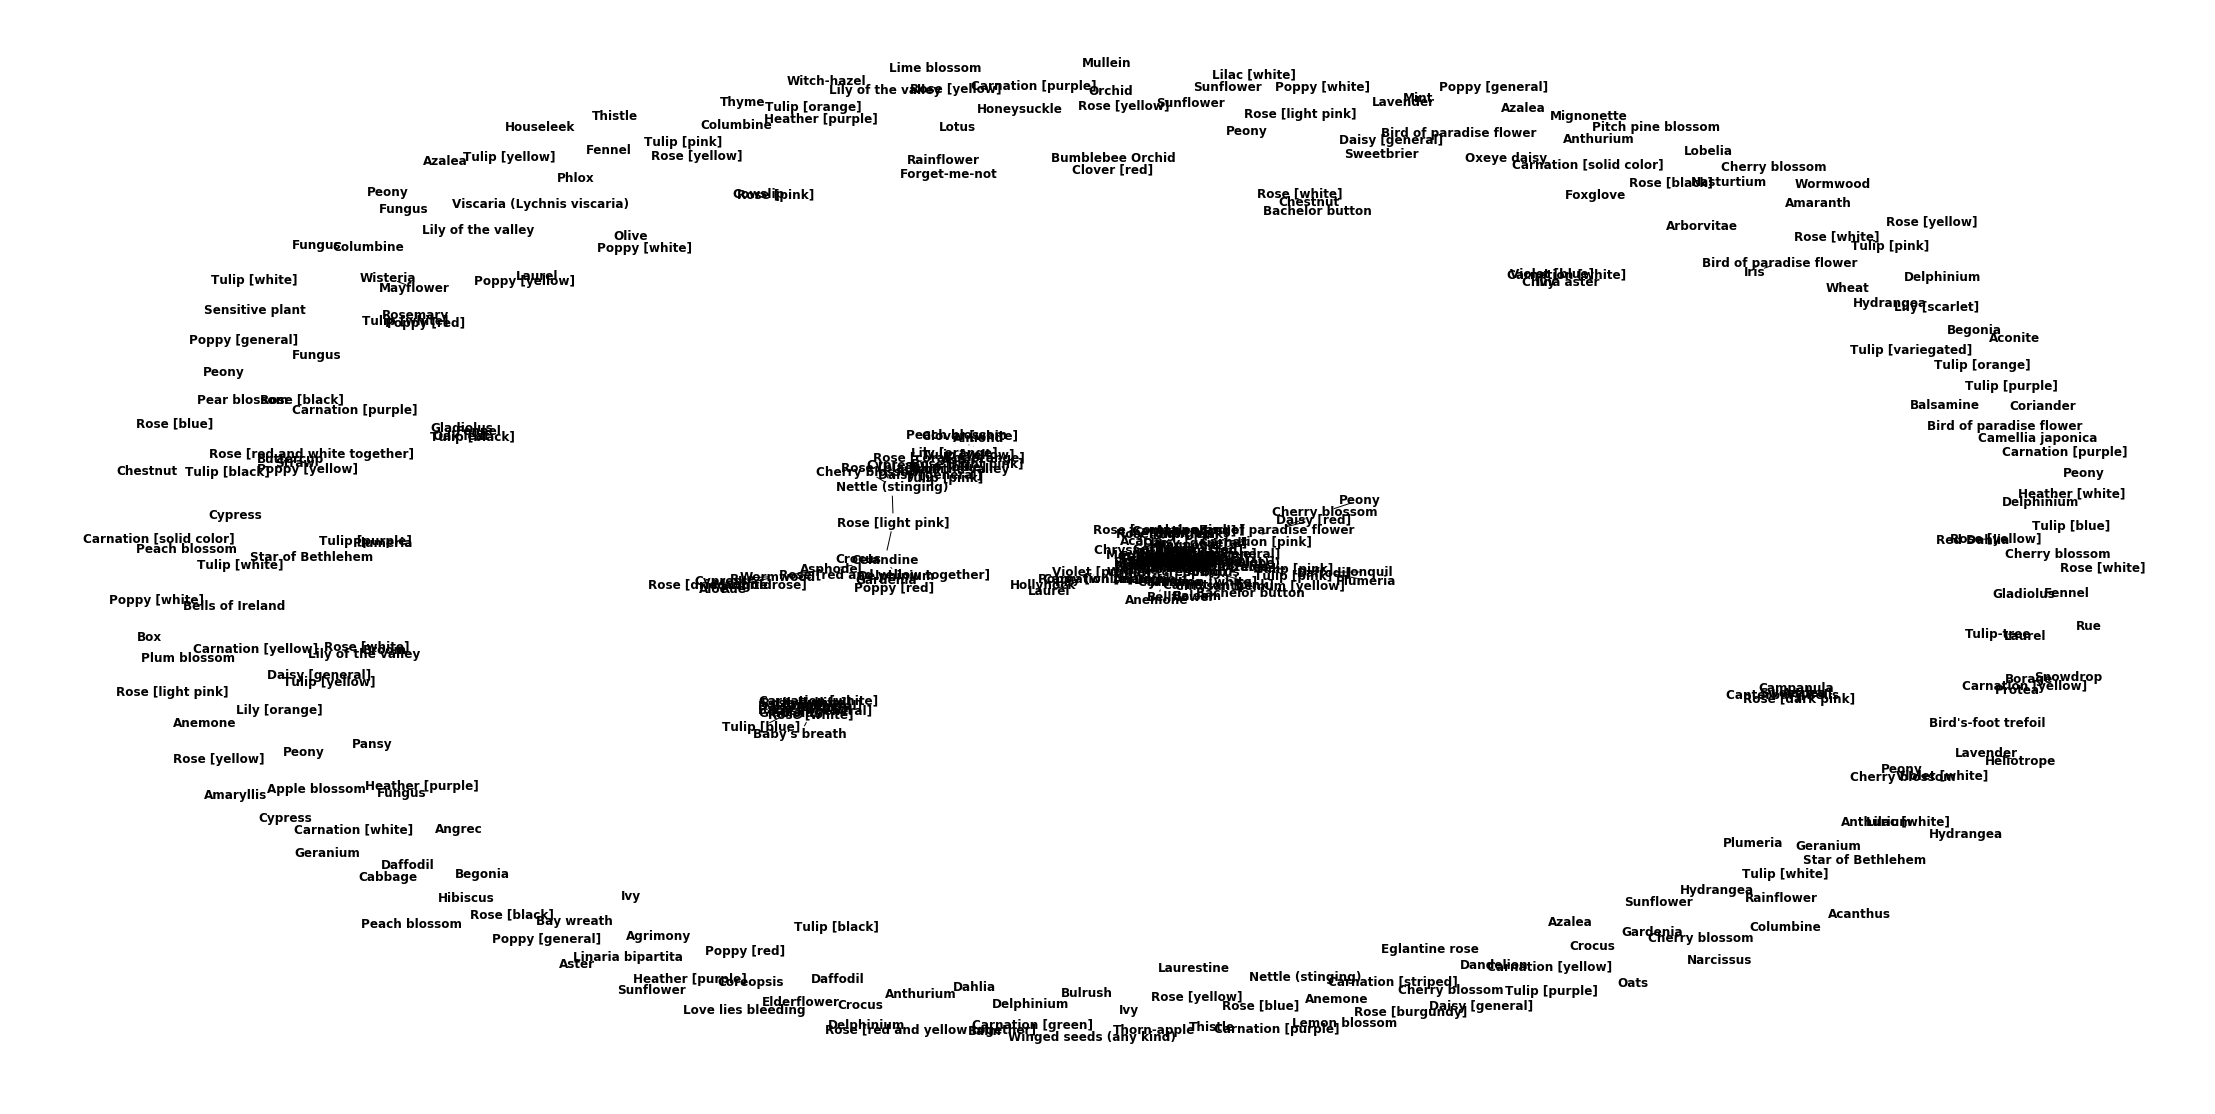

In [17]:
plt.figure(figsize=(30,15))

# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k =0.1 and iterations=50
pos = nx.spring_layout(flower_graph, k=0.20, iterations=60)
#pos = nx.kamada_kawai_layout(flower_graph)

nx.draw_spring(flower_graph, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)

<Figure size 2160x1080 with 0 Axes>

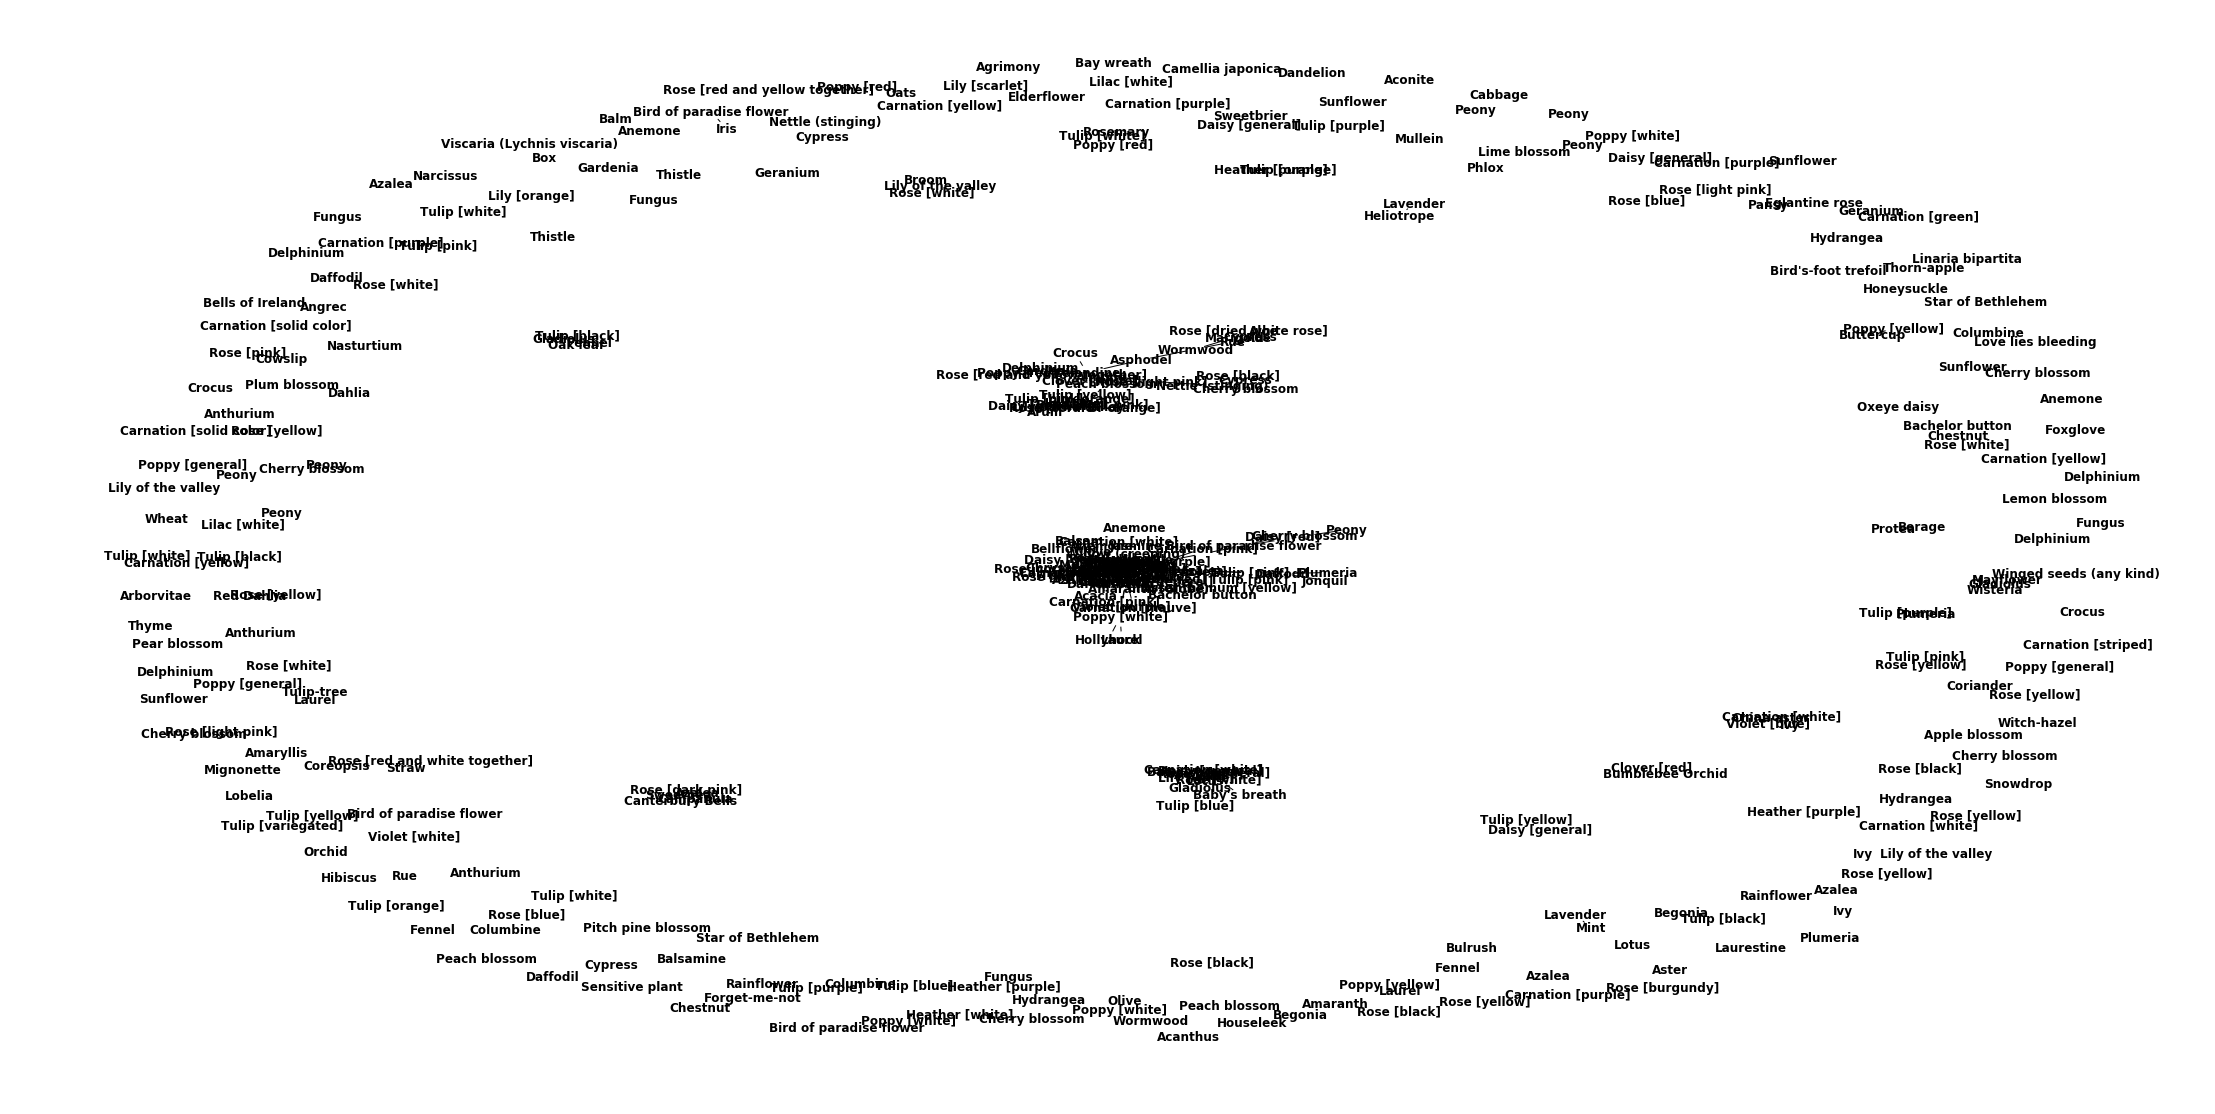

In [18]:
plt.figure(figsize=(30,15))
pos = nx.kamada_kawai_layout(flower_graph)
nx.draw_spring(flower_graph, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)
plt.savefig("../Graphs/static_threshold_40.png")

### Using lower similarity threshold limit (0.3)

In [19]:
flower_graph_threshold_30 = nx.Graph()

In [20]:
add_nodes_from_df(flower_graph_threshold_30, flower_data)
#flower_graph.nodes.data()

In [21]:
add_edges_from_df(flower_graph_threshold_30, flower_data, "SimilarIndex30")
#flower_graph.edges.data()

<Figure size 4320x2160 with 0 Axes>

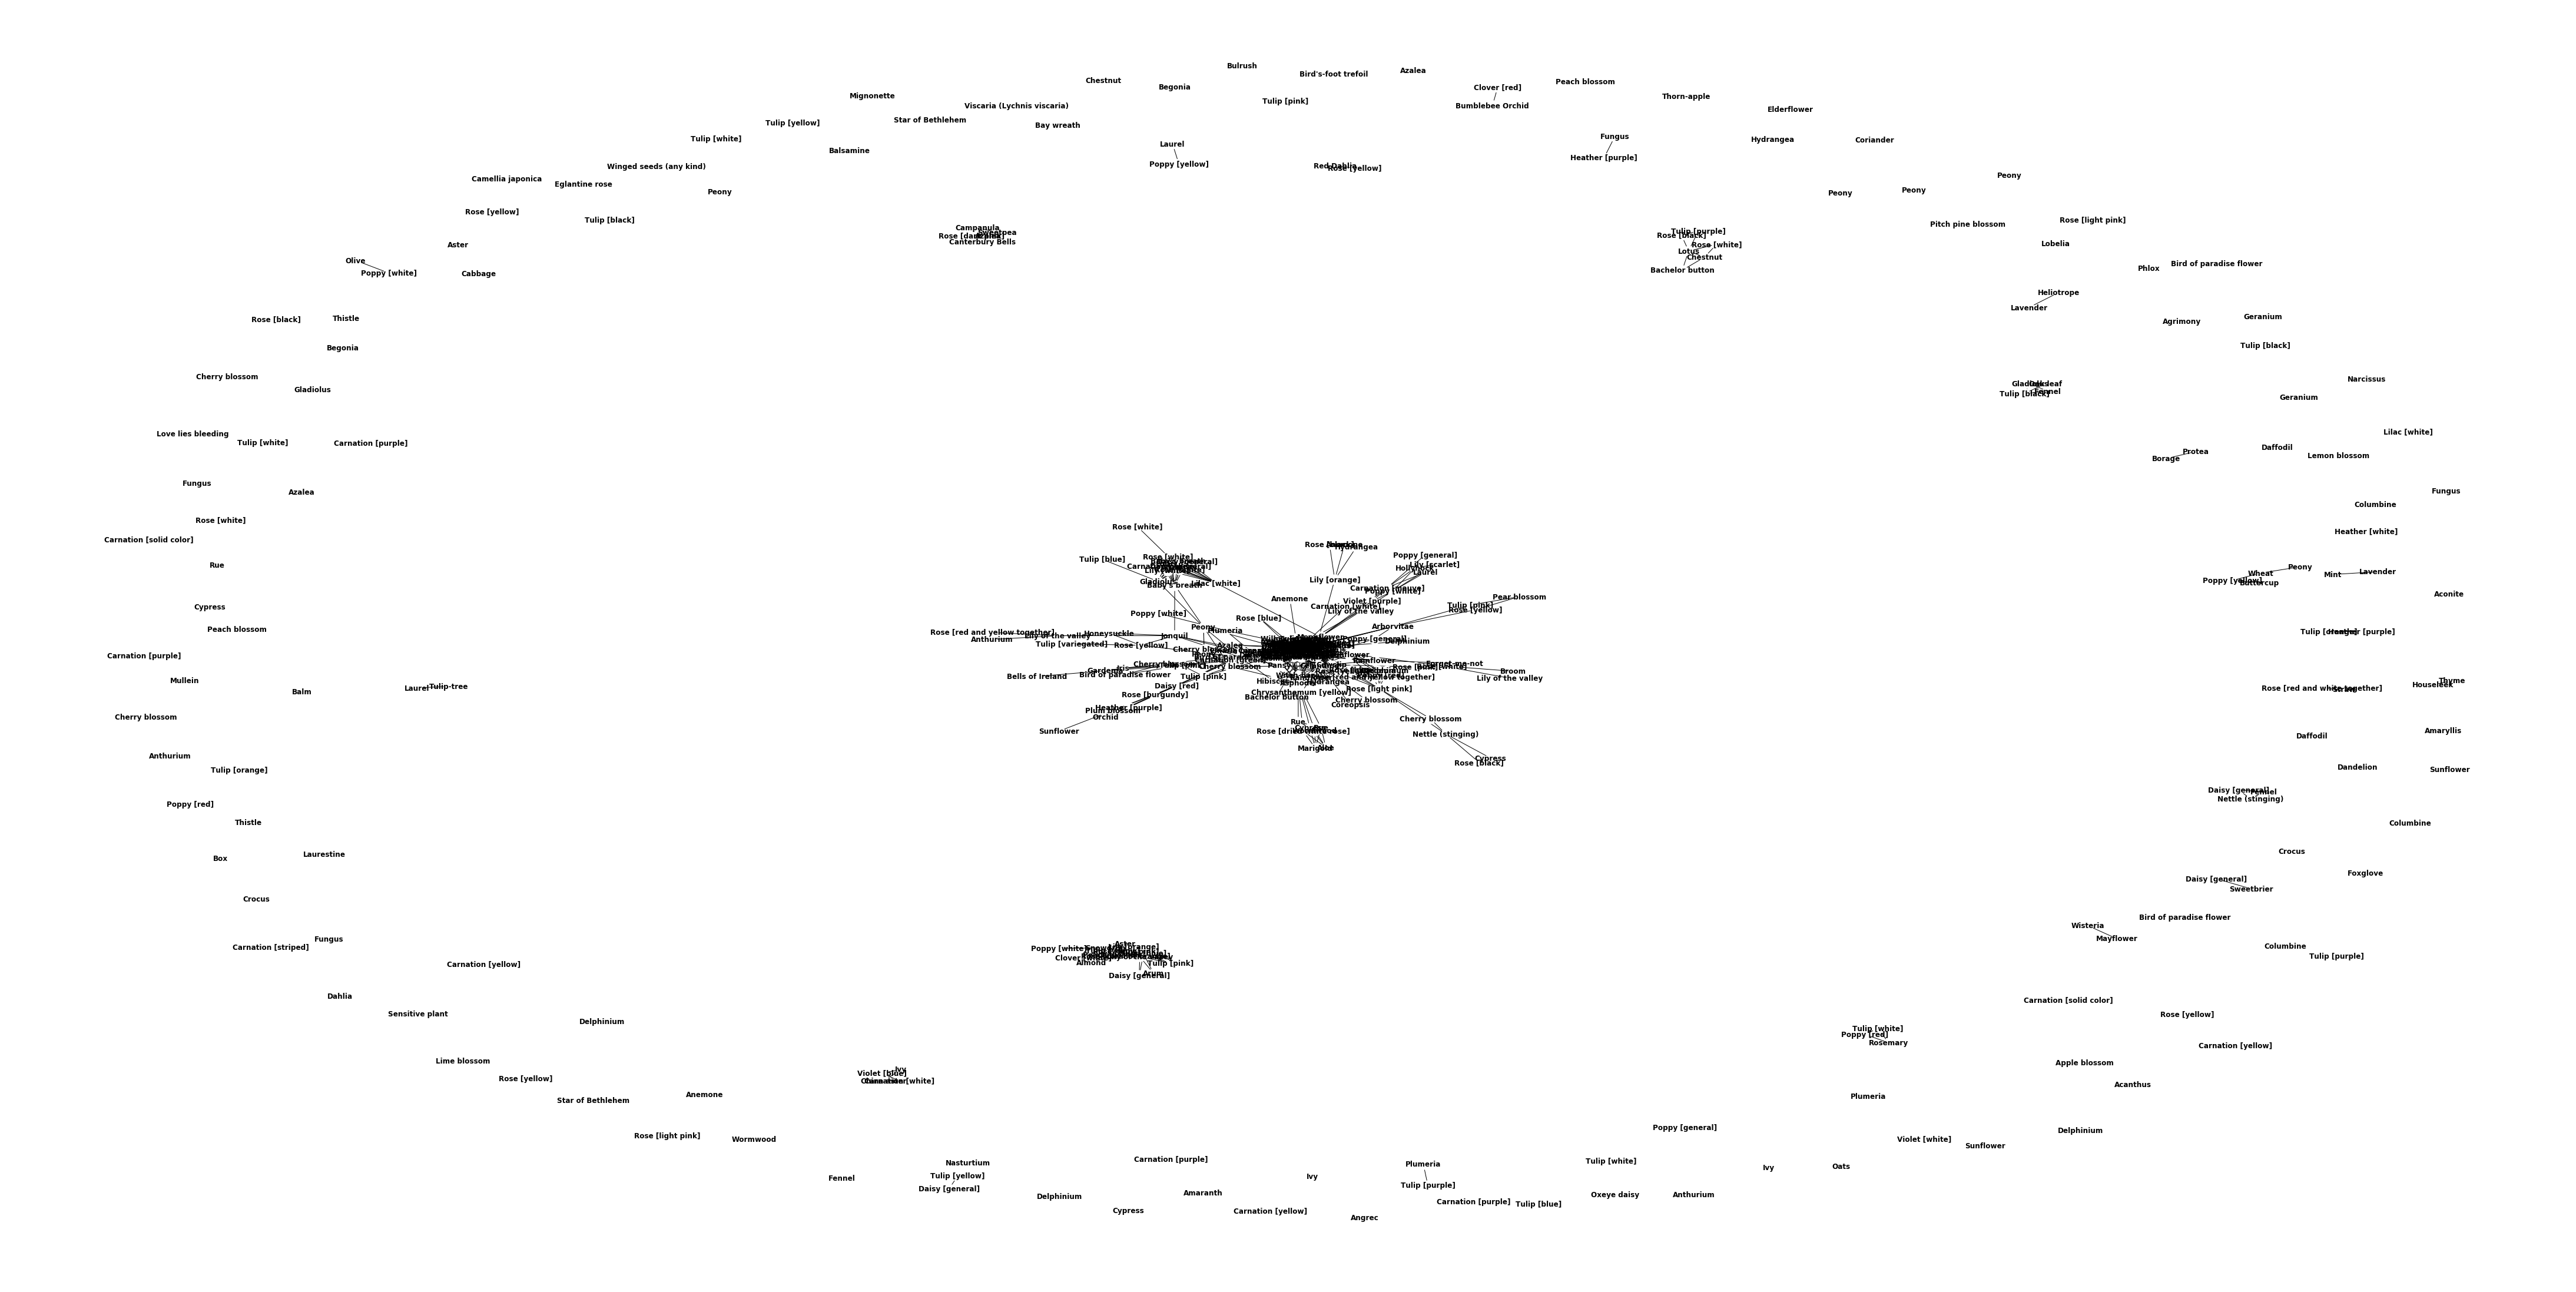

In [22]:
plt.figure(figsize=(60,30))
pos = nx.spring_layout(flower_graph_threshold_30, k=10, iterations=20)
nx.draw_spring(flower_graph_threshold_30, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)
plt.savefig("../Graphs/static_threshold_30.png")

### Using lower similarity threshold limit (0.2)

In [23]:
flower_graph_threshold_20 = nx.Graph()

In [24]:
add_nodes_from_df(flower_graph_threshold_20, flower_data)
#flower_graph.nodes.data()

In [25]:
add_edges_from_df(flower_graph_threshold_20, flower_data, "SimilarIndex30")
#flower_graph.edges.data()

<Figure size 4320x2160 with 0 Axes>

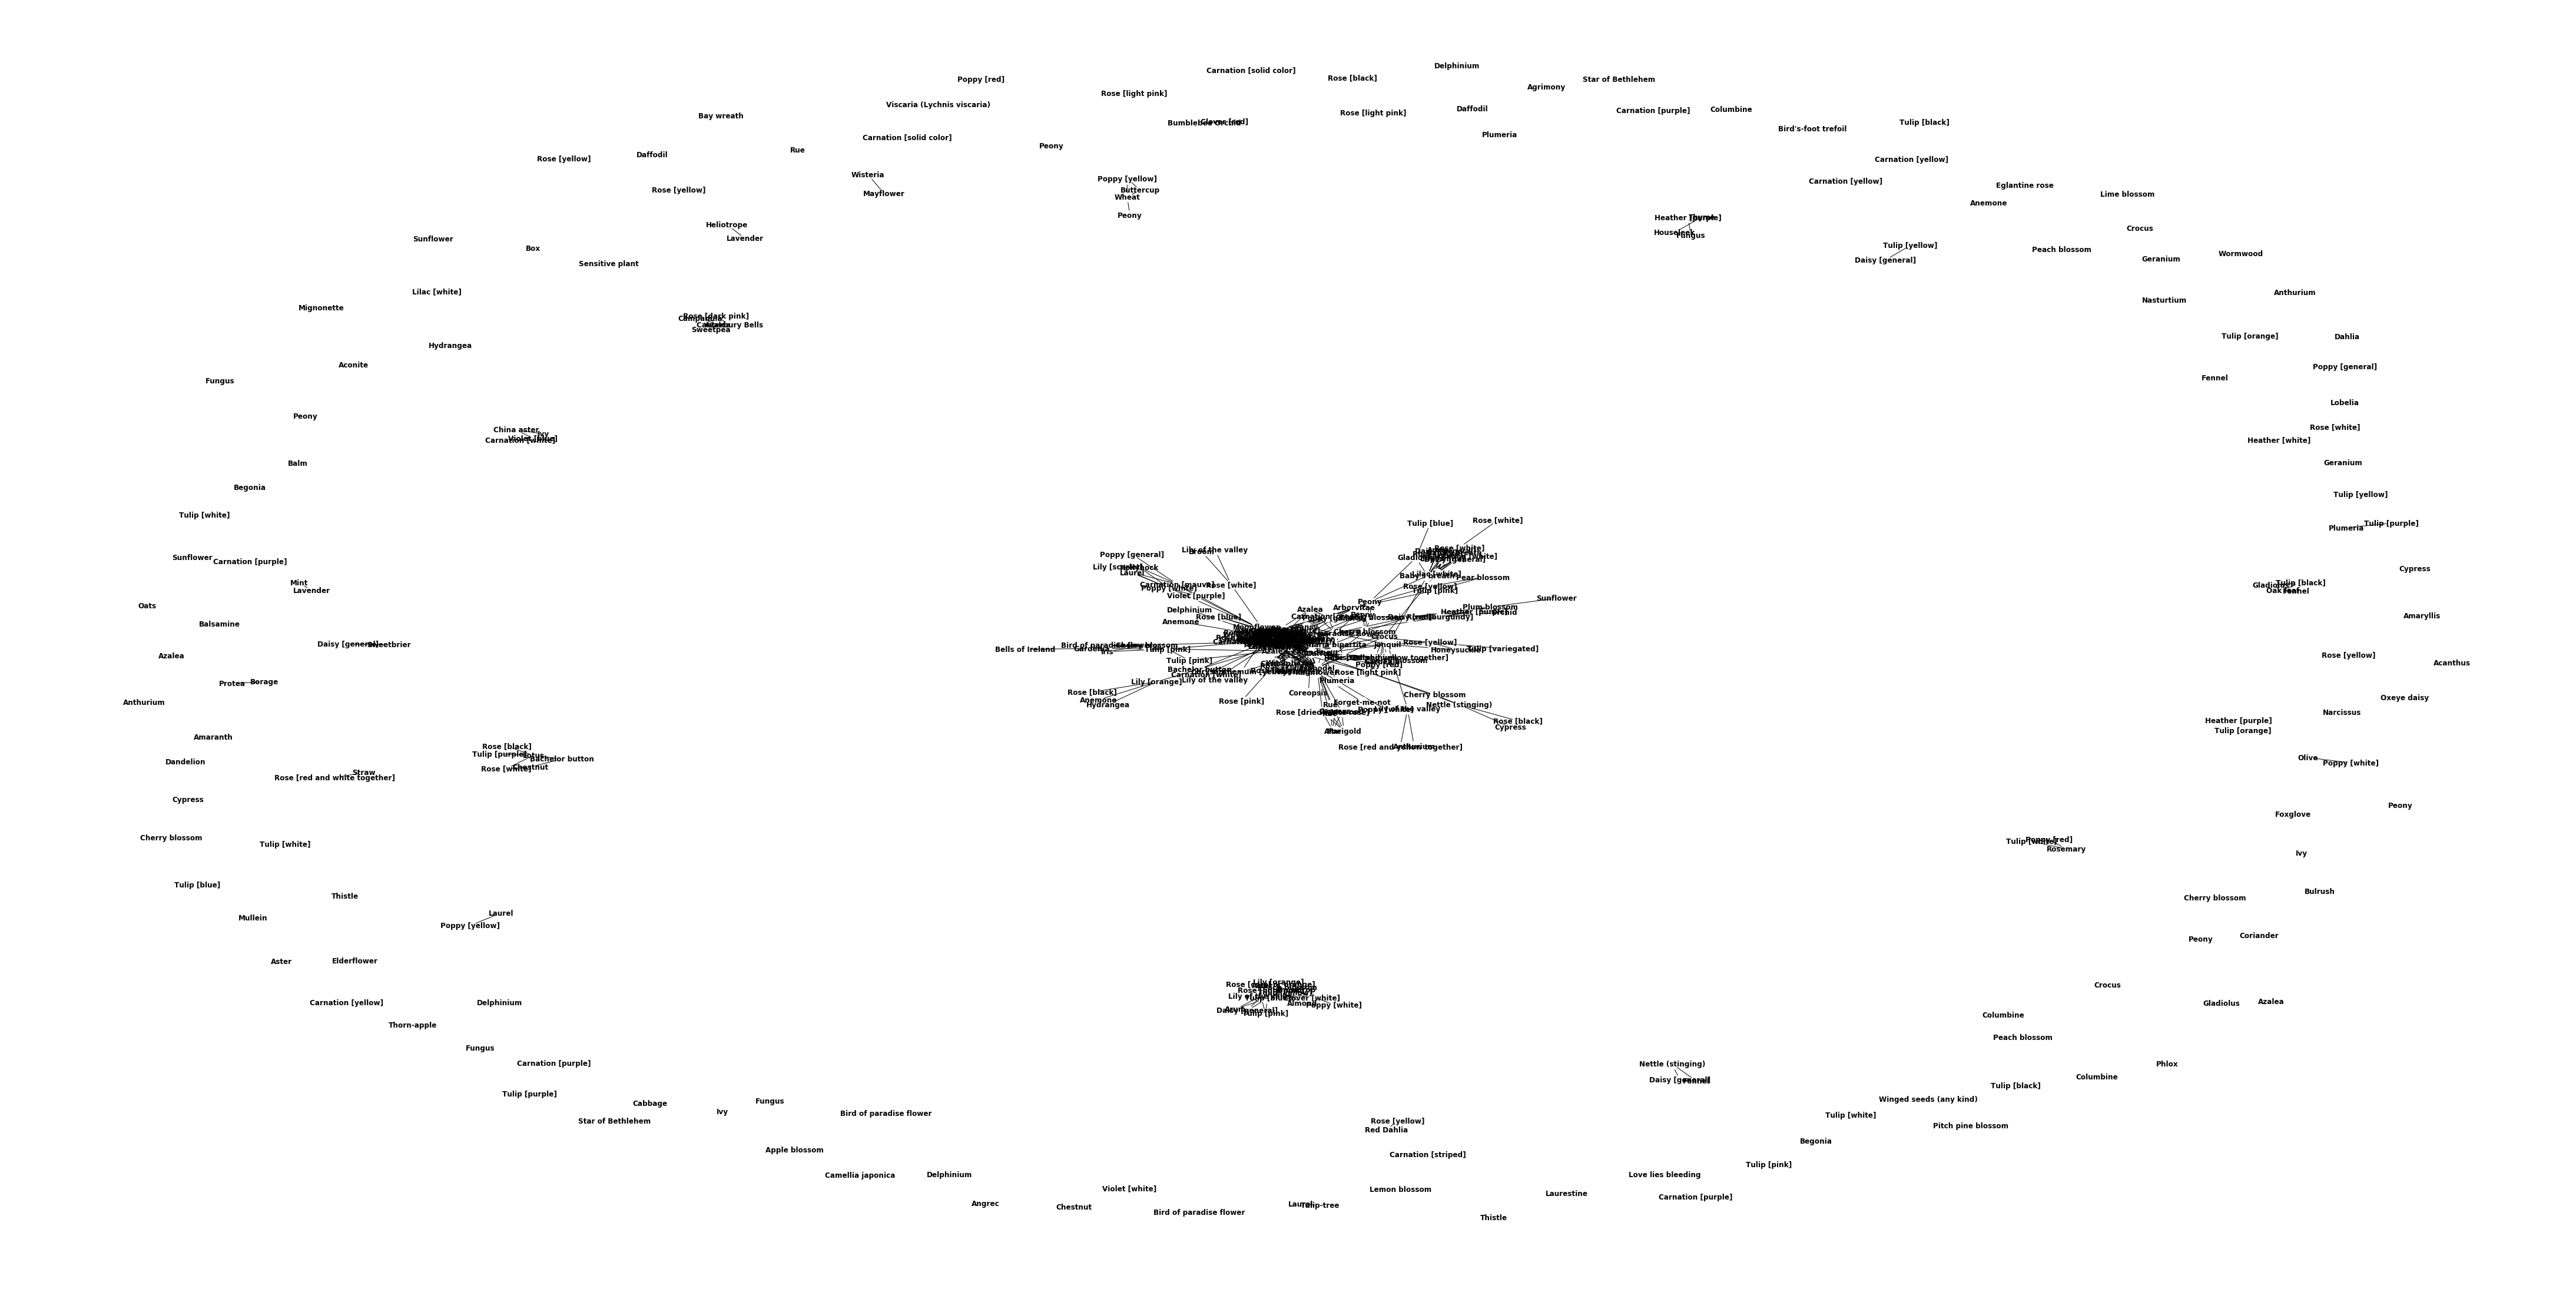

In [26]:
plt.figure(figsize=(60,30))
pos = nx.spring_layout(flower_graph_threshold_20, k=10, iterations=1)
nx.draw_spring(flower_graph_threshold_20, with_labels=True, font_weight='bold', node_color="w", labels=node_flower_name)
plt.savefig("../Graphs/static_threshold_20.png")

# Interactive network graph with Holoviews & bokeh

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
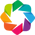

In [27]:
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx

hv.extension('bokeh')

%opts Graph [width=900 height=900]


In [28]:
def get_graph(iteration, graph):
    np.random.seed(10)
    return hv.Graph.from_networkx(graph, nx.spring_layout, iterations=iteration)

interactive_graph = hv.HoloMap({i: get_graph(i, flower_graph_threshold_30) for i in range(5, 30, 5)},
           kdims='Iterations').redim.range(x=(-1.2, 1.2), y=(-1.2, 1.2))

In [30]:
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(interactive_graph)
bundled

:HoloMap   [Iterations]
   :Graph   [start,end]